In [1]:
import pandas as pd
import re

In [2]:
df =  pd.read_csv("results.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.isna().sum()  ## df.isna().sum() ifadesinin çıktısı, df veri çerçevesindeki her bir sütundaki eksik değerlerin toplam sayısını içerir.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [7]:
df.sort_values("date").tail() ##veri çerçevesindeki tarihe göre sıralanmış satırların en son beş gözlemini görüntüler.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
46284,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
46285,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
46287,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
46286,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
46288,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [8]:
df = df[(df["date"] >= "2021-07-11")].reset_index(drop=True) ##son EURO başlangıcı

In [9]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2622,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
2623,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
2625,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
2624,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
2626,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [10]:
df.home_team.value_counts()

home_team
Mexico           36
United States    35
Qatar            33
Bahrain          32
Morocco          29
                 ..
Chameria          1
Aymara            1
Elba Island       1
Ticino            1
Tibet             1
Name: count, Length: 242, dtype: int64

In [11]:
rank = pd.read_csv("fifa_ranking-2023-07-20.csv")

In [12]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2021-07-11")].reset_index(drop=True)

In [13]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

C:\Users\erens\AppData\Local\Temp\ipykernel_17992\1689758223.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


In [14]:
df_euro_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_euro_ranked = df_euro_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [15]:
df_euro_ranked[(df_euro_ranked.home_team == "Germany") | (df_euro_ranked.away_team == "Germany")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
1059,2022-09-26,England,Germany,3,3,UEFA Nations League,London,England,False,1737.46,1737.46,5.0,0.0,1658.96,1658.96,11.0,0.0
1129,2022-11-16,Oman,Germany,0,1,Friendly,Muscat,Oman,False,1320.29,1323.03,75.0,0.0,1650.21,1658.96,11.0,0.0
1193,2022-11-23,Germany,Japan,1,2,FIFA World Cup,Al Rayyan,Qatar,True,1650.21,1658.96,11.0,0.0,1559.54,1554.69,24.0,0.0
1207,2022-11-27,Spain,Germany,1,1,FIFA World Cup,Al Khor,Qatar,True,1715.22,1716.93,7.0,1.0,1650.21,1658.96,11.0,0.0
1221,2022-12-01,Costa Rica,Germany,2,4,FIFA World Cup,Al Khor,Qatar,True,1503.59,1500.06,31.0,-3.0,1650.21,1658.96,11.0,0.0
1337,2023-03-25,Germany,Peru,2,0,Friendly,Mainz,Germany,False,1646.91,1650.21,14.0,3.0,1564.30,1561.01,21.0,-2.0
1394,2023-03-28,Germany,Belgium,2,3,Friendly,Cologne,Germany,False,1646.91,1650.21,14.0,3.0,1781.30,1816.71,4.0,2.0
1433,2023-06-12,Germany,Ukraine,3,3,Friendly,Bremen,Germany,False,1647.42,1646.91,14.0,0.0,1530.04,1536.99,30.0,4.0
1459,2023-06-16,Poland,Germany,1,0,Friendly,Warsaw,Poland,False,1553.76,1559.83,23.0,1.0,1647.42,1646.91,14.0,0.0
1532,2023-06-20,Germany,Colombia,0,2,Friendly,Gelsenkirchen,Germany,False,1647.42,1646.91,14.0,0.0,1617.08,1612.78,17.0,0.0


# ÖZELLİKLER

### Kazanılan puanlar, atılan ve yenilen goller, resmi maç,takım sıralamaları, takımların sıralamadaki artışları, karşılaşılan sıralamaya göre atılan ve yenilen goller

In [16]:
df = df_euro_ranked

In [17]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [18]:
df[["result", "home_team_points", "away_team_points"]] = results

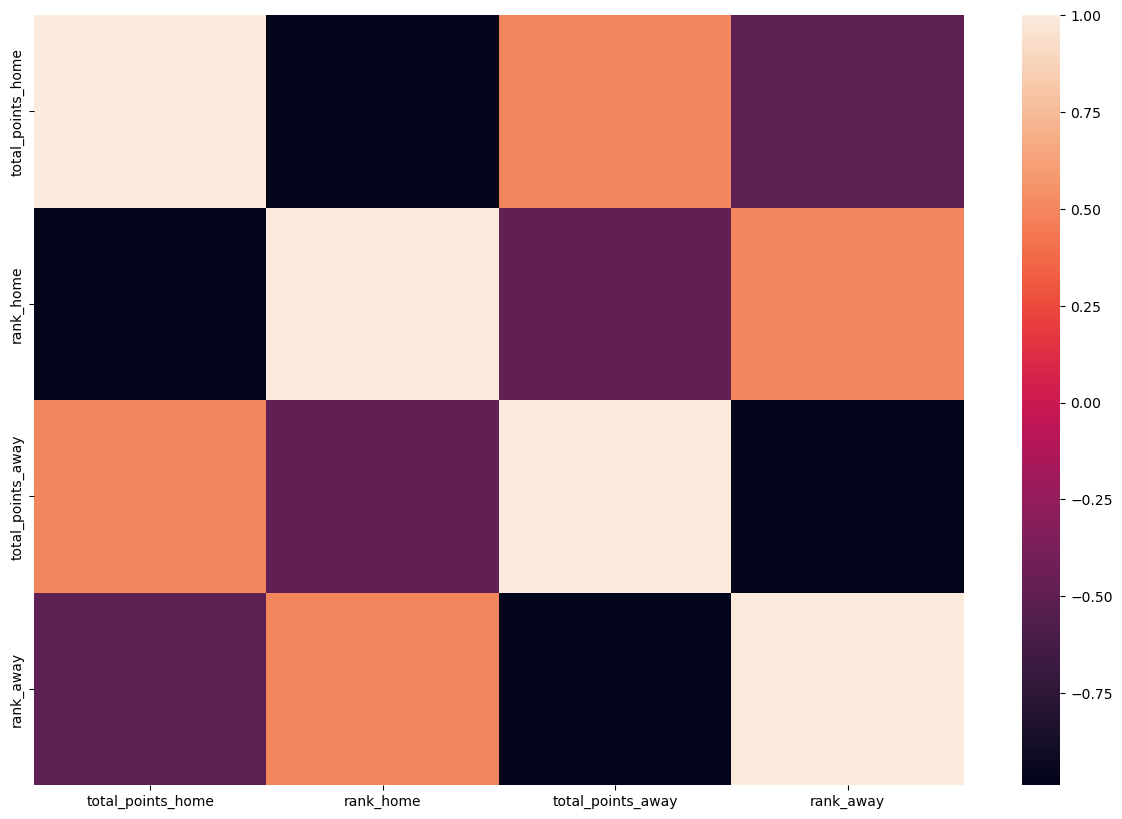

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [20]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [21]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [22]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [23]:
team_stats = pd.concat([home_team, away_team]).sort_values("date").reset_index(drop=True)


In [24]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

### 
Takımın Dünya Kupası Döngüsündeki ortalama golleri.
Takımın son 5 maçtaki ortalama golleri.
Takımın Dünya Kupası Döngüsü'nde attığı ortalama goller.
Takımın son 5 maçta ortalama gol yedi.
Takımın Dünya Kupası Döngüsünde karşılaştığı ortalama FIFA Sıralaması.
Takımın son 5 maçta karşılaştığı ortalama FIFA Sıralaması.
Döngüde kazanılan FIFA Puanları.
Son 5 maçta kazanılan FIFA Puanları.
Döngüdeki ortalama oyun puanları.
Son 5 maçtaki ortalama oyun puanı.
Döngüde karşılaşılan sıralamaya göre ortalama oyun puanı.
Son 5 maçta karşılaşılan sıralamaya göre ortalama oyun puanı.

In [25]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [26]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [27]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [28]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [29]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [30]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [31]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [32]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [33]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [34]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [35]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [36]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [37]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
1581,2023-07-08,Panama,Qatar,57.0,58.0,4,0,0,-1.0,-1.0,...,0.812500,1.2,0.010137,0.010213,1.666667,1.4,0.022432,0.023465,True,False
1582,2023-07-08,Mexico,Costa Rica,14.0,42.0,2,0,0,-28.0,-1.0,...,1.636364,1.6,0.021831,0.014793,1.810811,2.4,0.033300,0.039027,True,False
1583,2023-07-09,Guatemala,Jamaica,116.0,63.0,0,1,1,53.0,0.0,...,2.058824,1.4,0.031623,0.029180,0.960000,1.4,0.018072,0.024275,True,False
1584,2023-07-12,Jamaica,Mexico,63.0,14.0,0,3,1,49.0,0.0,...,0.833333,0.8,0.007327,0.006642,1.842105,2.4,0.033677,0.038206,True,False
1585,2023-07-16,Mexico,Panama,14.0,57.0,1,0,0,-43.0,-1.0,...,NaN,NaN,NaN,NaN,1.448276,1.4,0.032544,0.028361,True,False


In [38]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  185
home_goals_mean_l5               185
home_goals_suf_mean              185
home_goals_suf_mean_l5           185
home_rank_mean                   185
home_rank_mean_l5                185
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                    6
away_goals_mean_l5                 6
away_goals_suf_mean                6
away_goals_suf_mean_l5             6
away_rank_mean                     6
away_rank_mean_l5                  6
away_points_mean                   0
away_points_mean_l5                0
h

In [39]:
base_df_no_fg = base_df.dropna()

In [40]:
df = base_df_no_fg

In [41]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

C:\Users\erens\AppData\Local\Temp\ipykernel_17992\1906038641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["result"].apply(lambda x: no_draw(x))


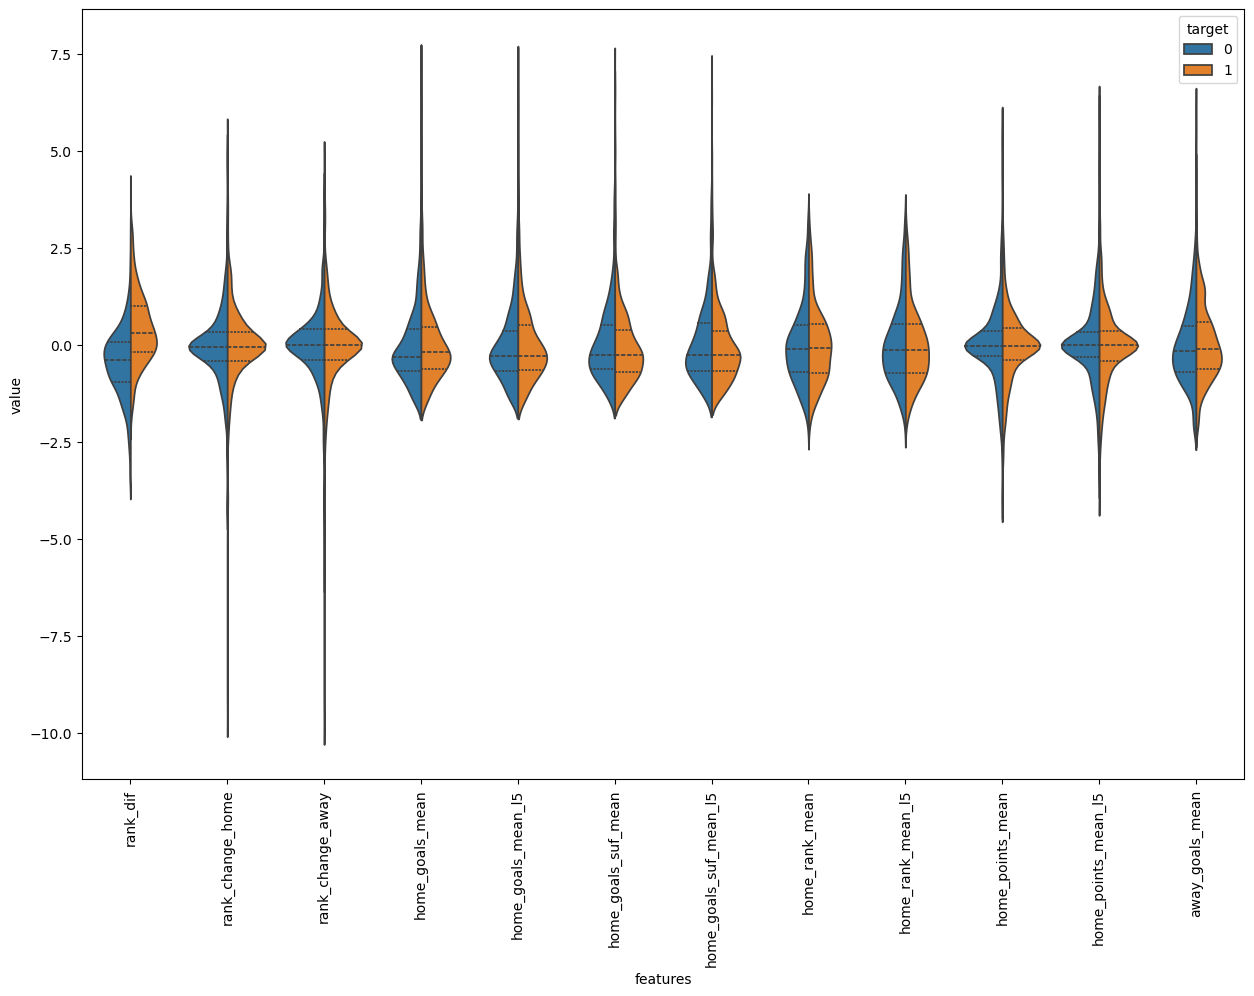

In [42]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

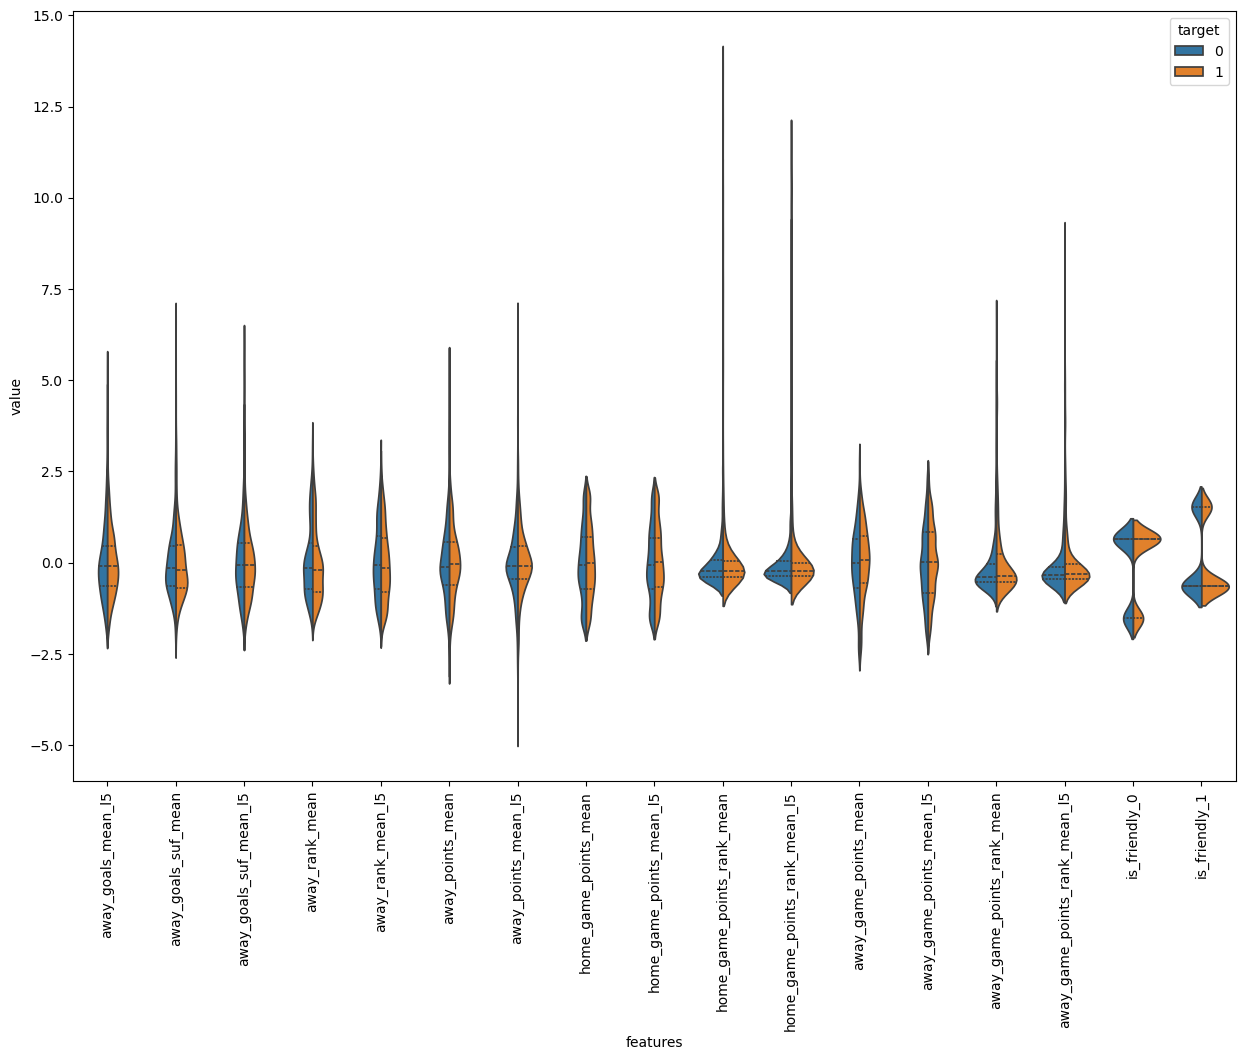

In [43]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [44]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

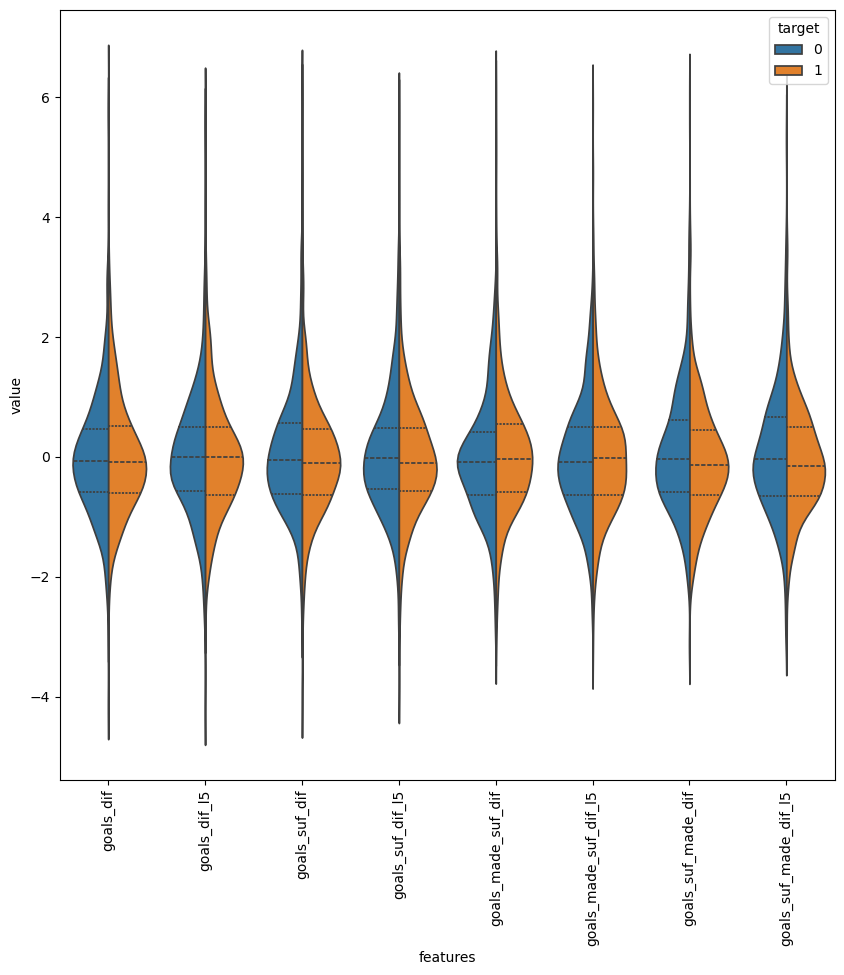

In [45]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [46]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [47]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

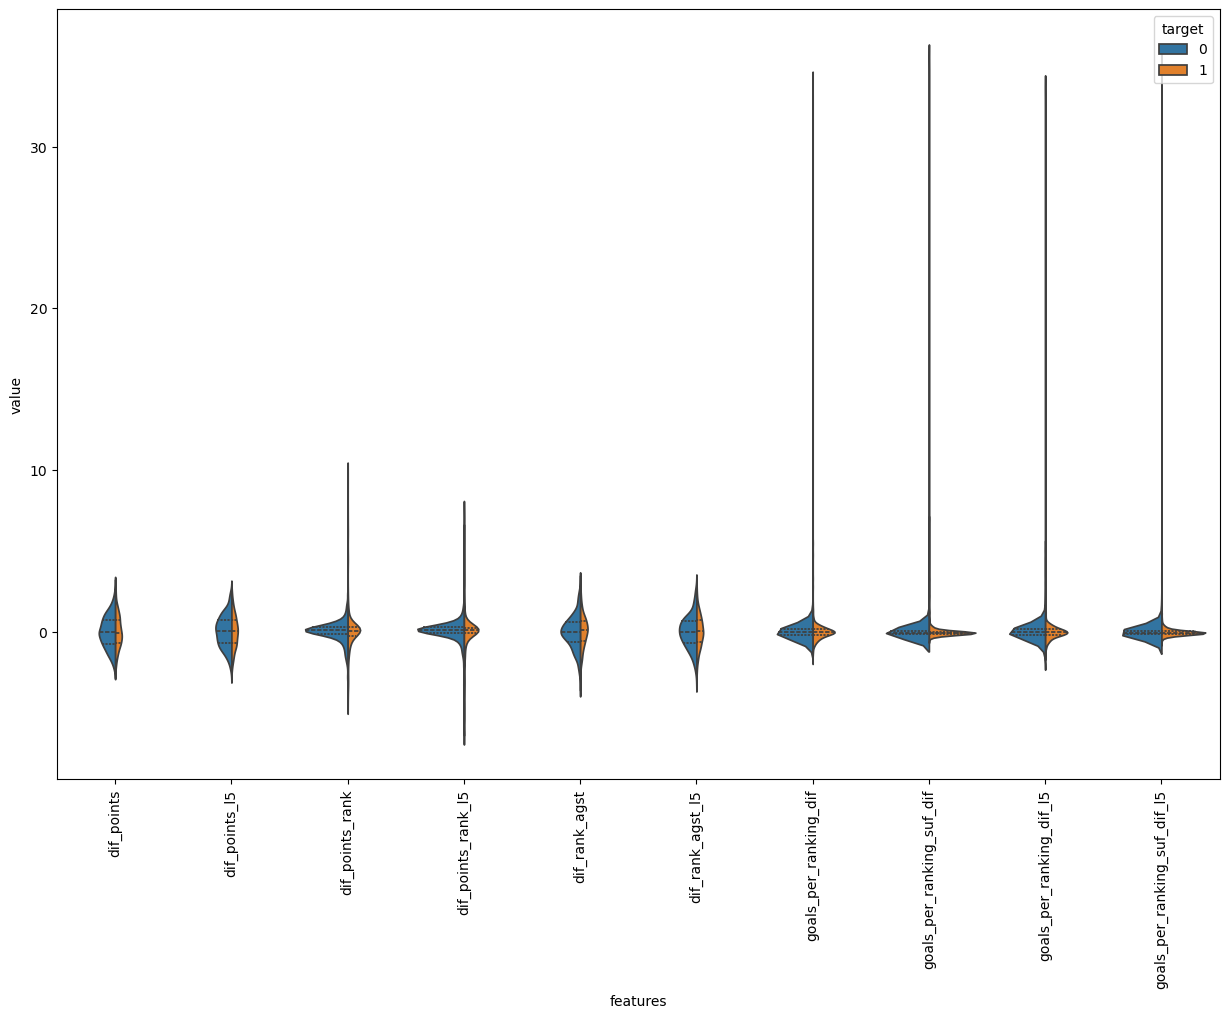

In [48]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

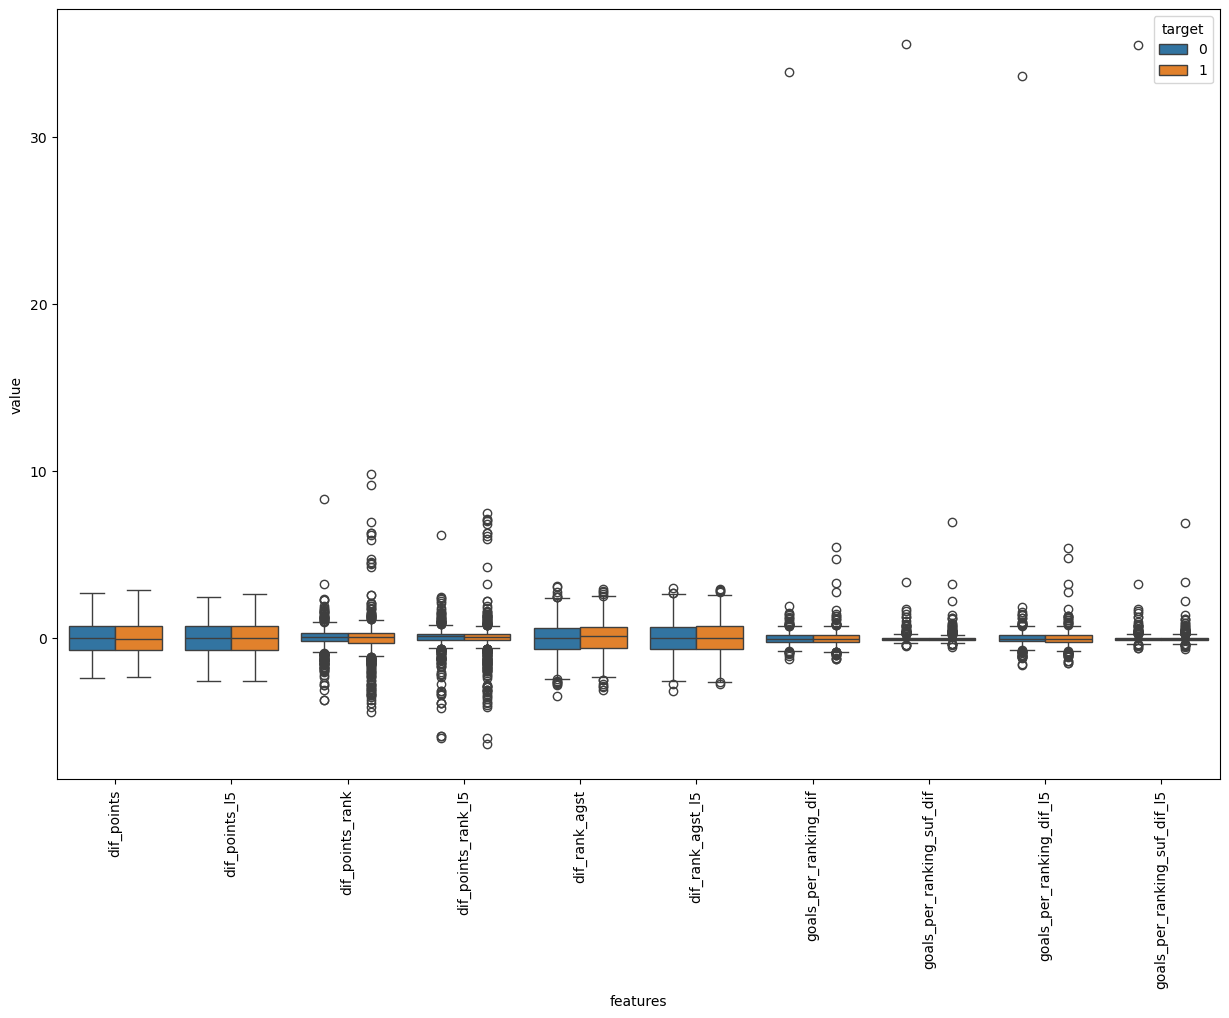

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

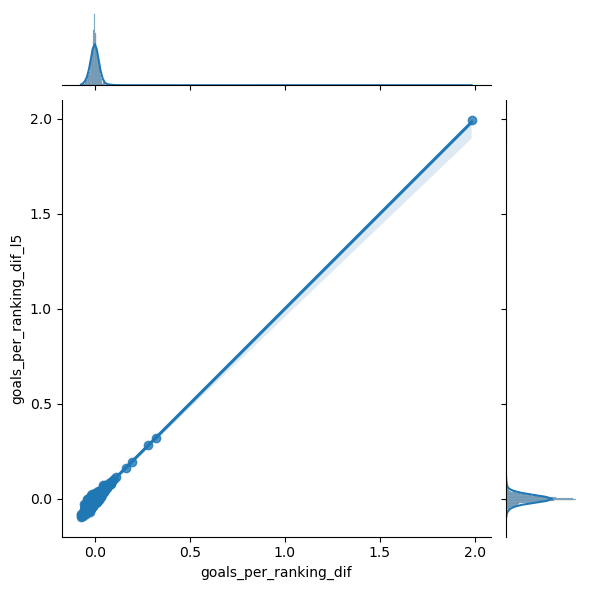

In [50]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

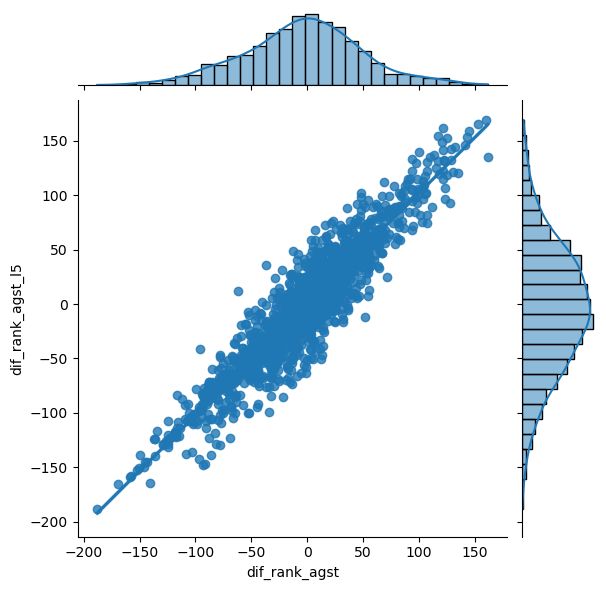

In [51]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

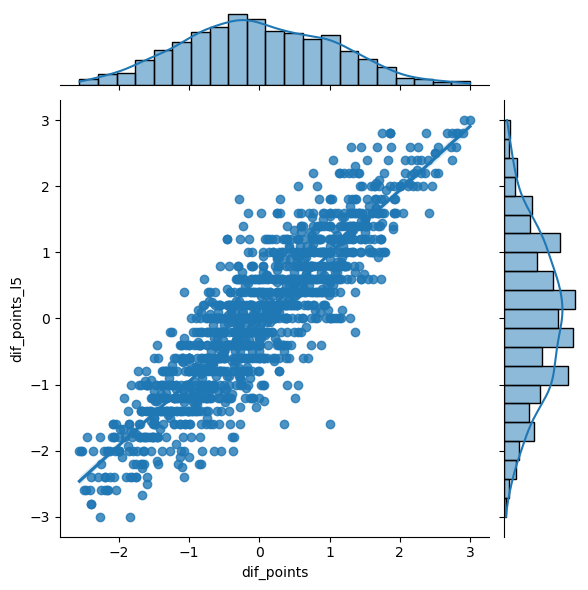

In [52]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

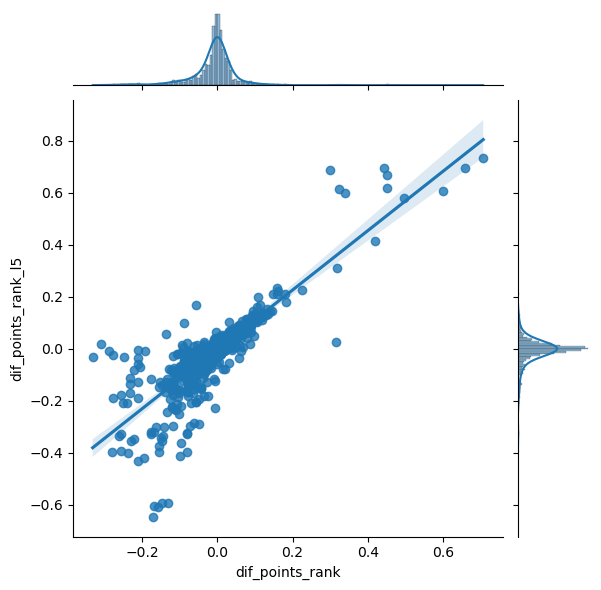

In [53]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

In [54]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [55]:
model_db = create_db(df)
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
4,Ethiopia,Uganda,0,53.0,0.111111,0.200000,-0.222222,-0.6,-0.007421,61.333333,59.000000,-0.008423,-0.005042,False,True
6,Comoros,Seychelles,0,-66.0,0.222222,0.000000,0.333333,0.6,-0.012615,60.000000,64.400000,-0.121610,-0.224923,False,True
9,Switzerland,Greece,0,-34.0,-2.333333,-2.333333,-1.000000,-1.0,-0.017370,-28.333333,-28.333333,-0.000001,-0.000001,False,True
62,Zimbabwe,South Africa,1,35.0,-2.181818,-2.600000,-0.272727,-0.2,-0.072289,33.818182,24.600000,-0.098977,-0.066981,True,False
66,Haiti,Jordan,0,-5.0,-1.000000,-1.800000,0.600000,0.6,-0.017845,44.400000,53.600000,-0.018607,-0.040918,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,Canada,Cuba,0,-121.0,0.601190,-0.200000,-1.041667,-0.8,0.000586,31.619048,-16.200000,0.009525,0.016329,True,False
1581,Panama,Qatar,0,-1.0,-0.613095,0.400000,0.782738,1.2,-0.005278,-14.526786,12.000000,-0.012295,-0.013252,True,False
1582,Mexico,Costa Rica,0,-28.0,-0.486486,-1.000000,0.162162,0.6,-0.015838,44.528256,46.800000,-0.011469,-0.024234,True,False
1583,Guatemala,Jamaica,1,53.0,1.489412,-0.800000,-0.832941,-0.8,0.012948,23.011765,-6.000000,0.013551,0.004905,True,False


# Model

In [56]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [59]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [60]:
gb = gb_cv.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=10,
                           n_estimators=200, random_state=5)

In [61]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [62]:
rf = rf_cv.best_estimator_
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [63]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

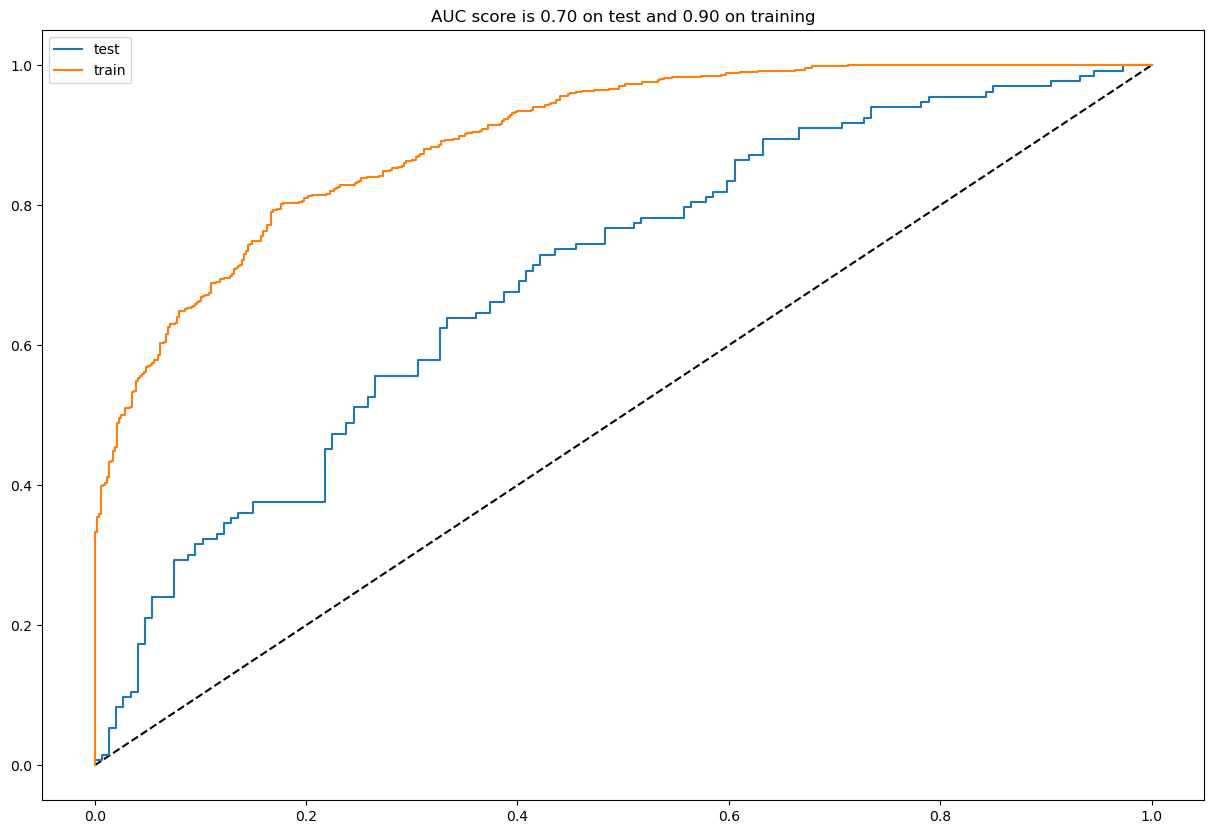

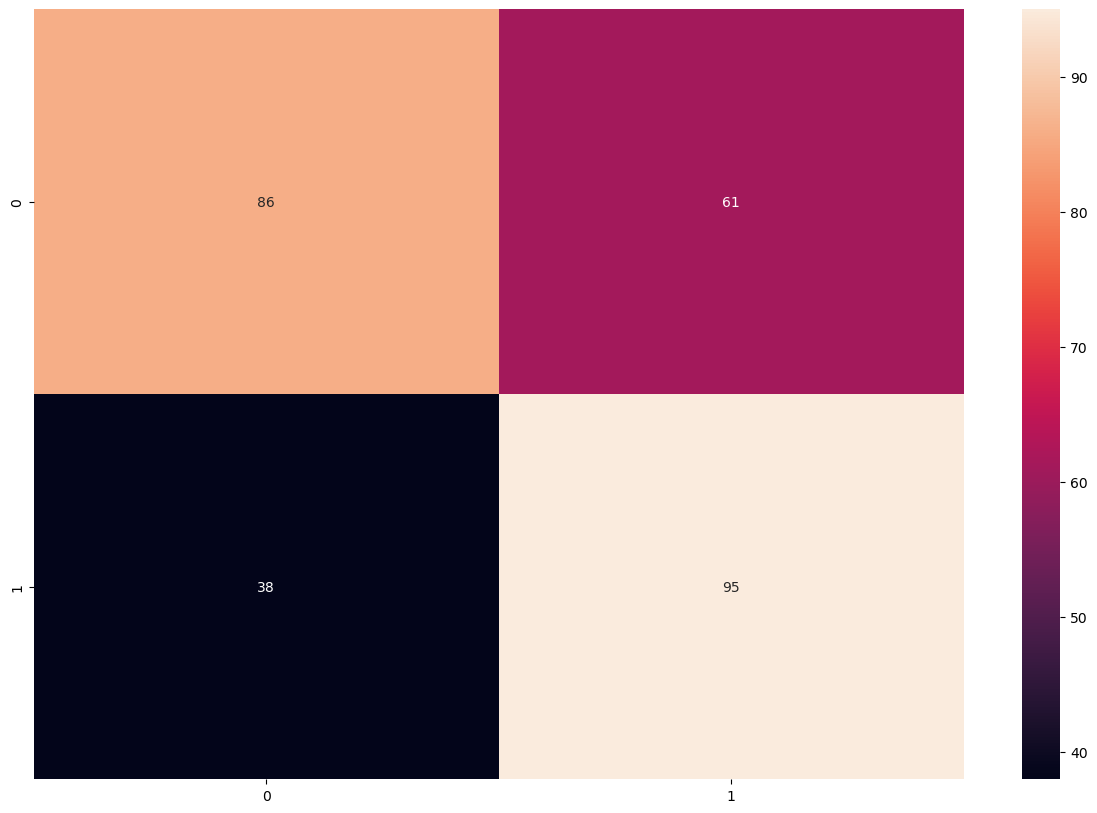

In [64]:
analyze (gb)

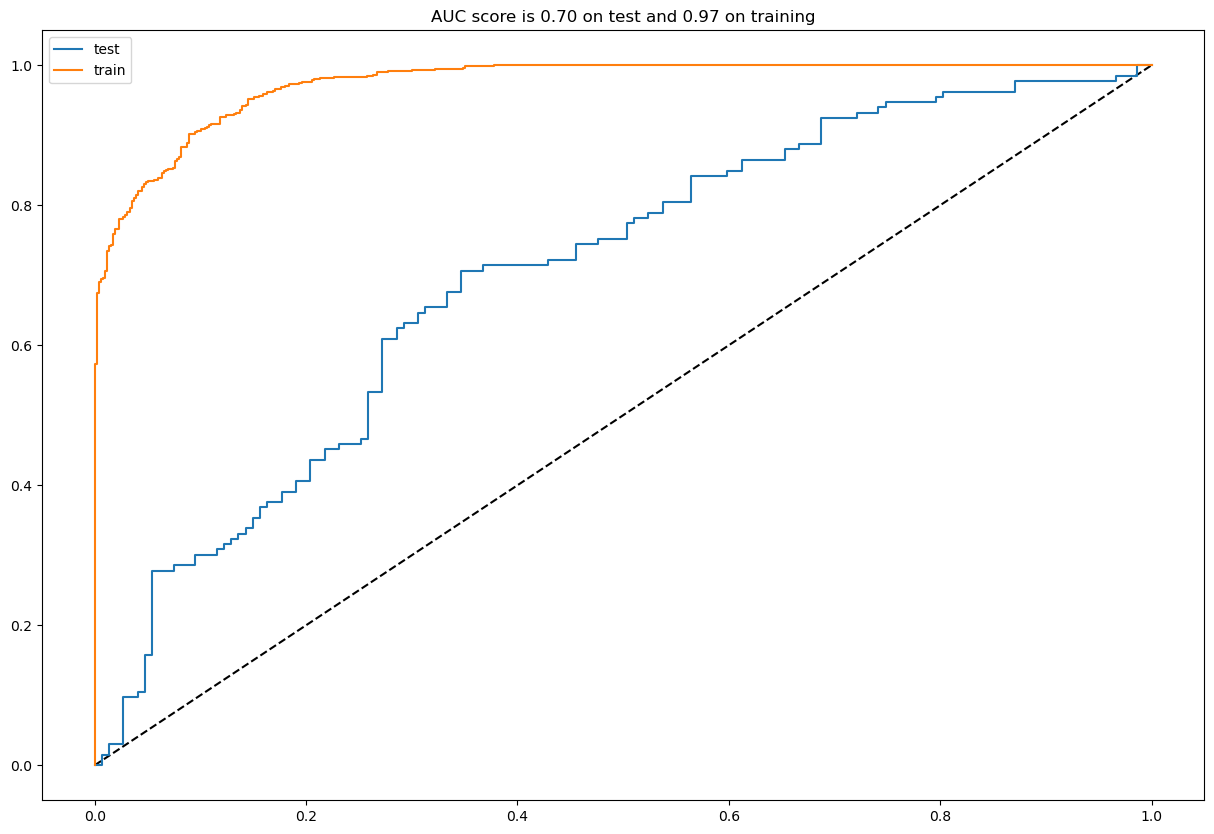

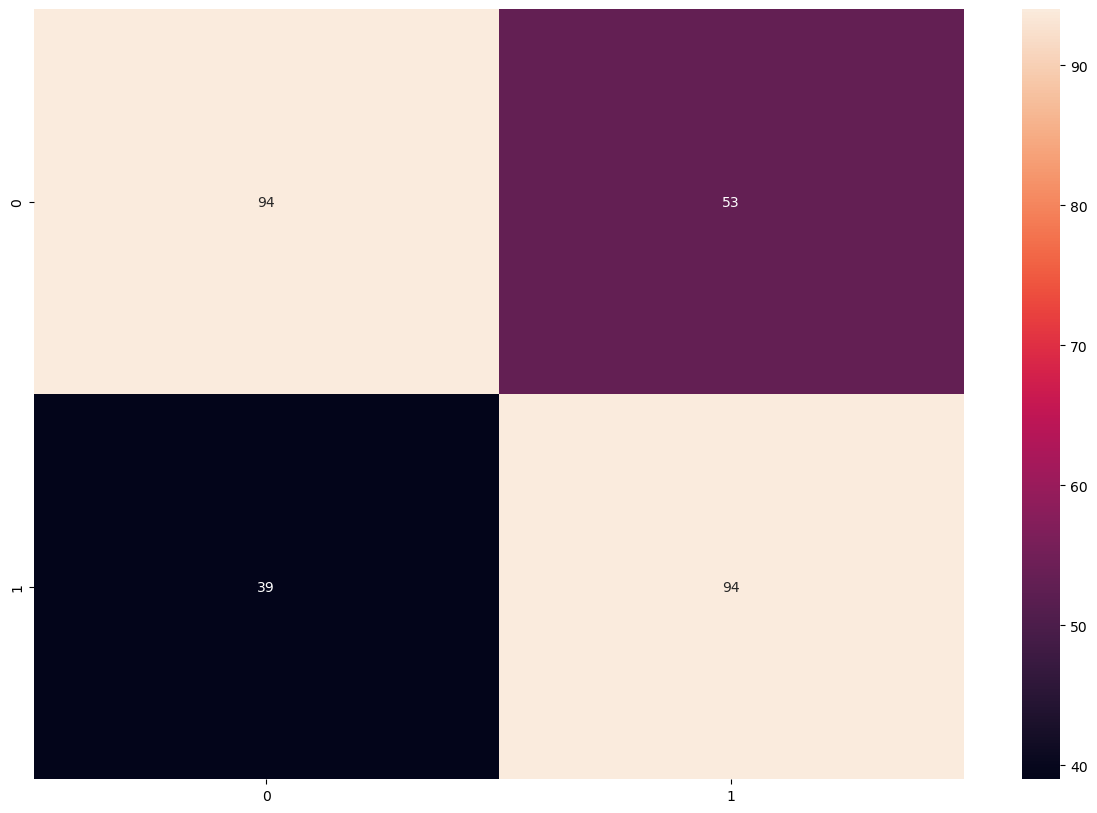

In [65]:
analyze(rf)

In [66]:
from operator import itemgetter

# UEFA EURO 2024 SIM

In [135]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('euro2024teams.csv')

print(df)

               Team Group  Position
0           Germany     A         1
1          Scotland     A         2
2           Hungary     A         3
3       Switzerland     A         4
4             Spain     B         1
5           Albania     B         2
6             Italy     B         3
7           Croatia     B         4
8           England     C         1
9           Denmark     C         2
10           Serbia     C         3
11         Slovenia     C         4
12           France     D         1
13          Austria     D         2
14      Netherlands     D         3
15           Poland     D         4
16          Belgium     E         1
17         Slovakia     E         2
18          Romania     E         3
19          Ukraine     E         4
20         Portugal     F         1
21           Turkey     F         2
22   Czech Republic     F         3
23          Georgia     F         4


In [136]:
import pandas as pd

# Güncellenmiş CSV dosyasını oku
df_teams = pd.read_csv("euro2024teams.csv")

matches = []
groups = df_teams["Group"].unique()

table = {}

for group_name in groups:
    group_teams = df_teams[df_teams["Group"] == group_name]["Team"].tolist()
    # Temizleme işlemi
    group_teams = [team.strip().replace("\xa0", "") for team in group_teams]
    table[group_name] = [[team, 0, []] for team in group_teams]

for i, row in df_teams.iterrows():
    team_1 = row["Team"].strip().replace("\xa0", "")
    position = row["Position"]
    group = row["Group"]
    
    if position == 1:
        continue
    
    # Takım 2'yi bulmak için sıralamayı azalt
    team_2 = df_teams[(df_teams["Group"] == group) & (df_teams["Position"] == position - 1)]["Team"].iloc[0].strip().replace("\xa0", "")
    
    matches.append((group, team_1, team_2))



In [137]:
table

{'A': [['Germany', 0, []],
  ['Scotland', 0, []],
  ['Hungary', 0, []],
  ['Switzerland', 0, []]],
 'B': [['Spain', 0, []],
  ['Albania', 0, []],
  ['Italy', 0, []],
  ['Croatia', 0, []]],
 'C': [['England', 0, []],
  ['Denmark', 0, []],
  ['Serbia', 0, []],
  ['Slovenia', 0, []]],
 'D': [['France', 0, []],
  ['Austria', 0, []],
  ['Netherlands', 0, []],
  ['Poland', 0, []]],
 'E': [['Belgium', 0, []],
  ['Slovakia', 0, []],
  ['Romania', 0, []],
  ['Ukraine', 0, []]],
 'F': [['Portugal', 0, []],
  ['Turkey', 0, []],
  ['Czech Republic', 0, []],
  ['Georgia', 0, []]]}

In [138]:
matches

[('A', 'Scotland', 'Germany'),
 ('A', 'Hungary', 'Scotland'),
 ('A', 'Switzerland', 'Hungary'),
 ('B', 'Albania', 'Spain'),
 ('B', 'Italy', 'Albania'),
 ('B', 'Croatia', 'Italy'),
 ('C', 'Denmark', 'England'),
 ('C', 'Serbia', 'Denmark'),
 ('C', 'Slovenia', 'Serbia'),
 ('D', 'Austria', 'France'),
 ('D', 'Netherlands', 'Austria'),
 ('D', 'Poland', 'Netherlands'),
 ('E', 'Slovakia', 'Belgium'),
 ('E', 'Romania', 'Slovakia'),
 ('E', 'Ukraine', 'Romania'),
 ('F', 'Turkey', 'Portugal'),
 ('F', 'Czech Republic', 'Turkey'),
 ('F', 'Georgia', 'Czech Republic')]